In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm, zscore,ttest_ind, f_oneway, pearsonr
from scipy.stats import shapiro, kstest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle
import streamlit as st


In [2]:
df = pd.read_csv('PP01_insurance.csv')

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
# Basic Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
# Check for missing values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
# A total of 986 records are available in tehe dataset. There are no NULLs in the dataset

In [7]:
# Summary statistics
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


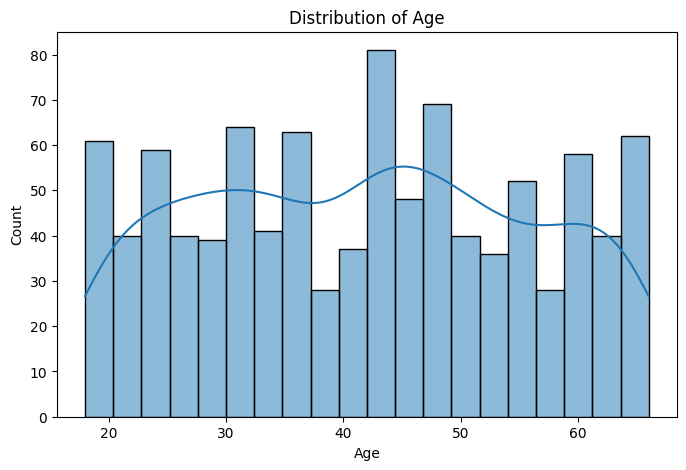

In [8]:
# Step 2.1: Distribution Analysis
# Distribution plots for numerical data

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title(f'Distribution of Age')
plt.show()

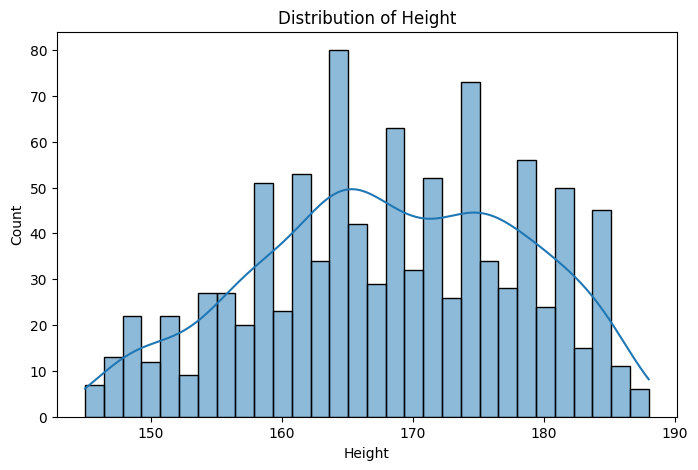

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Height'], kde=True, bins=30)
plt.title(f'Distribution of Height')
plt.show()

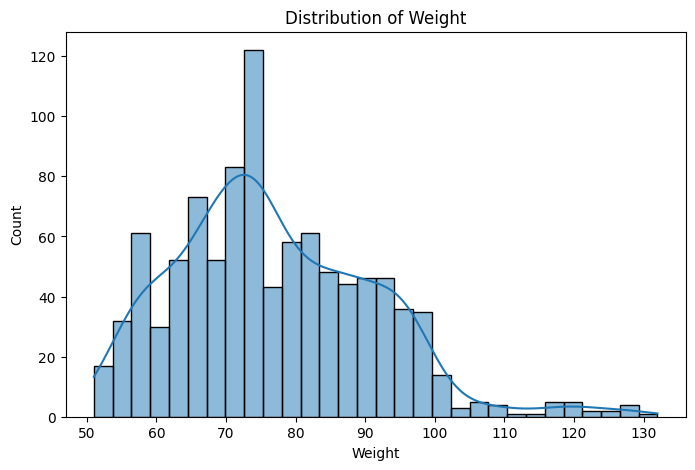

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], kde=True, bins=30)
plt.title(f'Distribution of Weight')
plt.show()

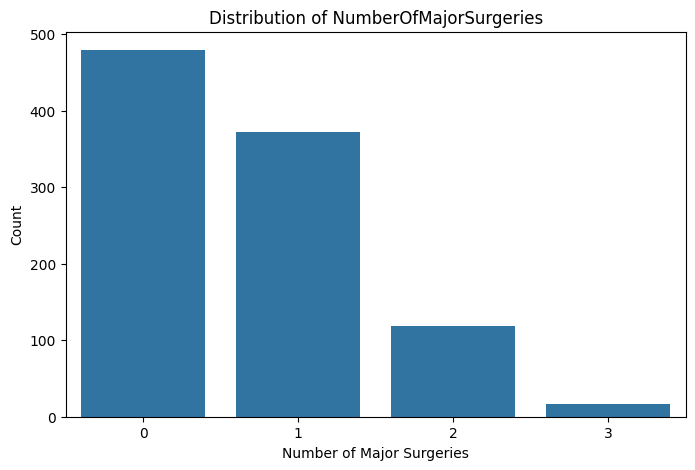

In [11]:
# Column chart for the distribution of NumberOfMajorSurgeries
plt.figure(figsize=(8, 5))
sns.countplot(x='NumberOfMajorSurgeries', data=df)
plt.title('Distribution of NumberOfMajorSurgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Count')
plt.show()

In [12]:
# Create BMI feature
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [13]:
# Preview the updated dataframe
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [14]:
# Summary statistics for BMI
print(df['BMI'].describe())

count    986.000000
mean      27.460709
std        5.878671
min       15.156281
25%       23.393392
50%       27.156602
75%       30.759870
max       50.000000
Name: BMI, dtype: float64


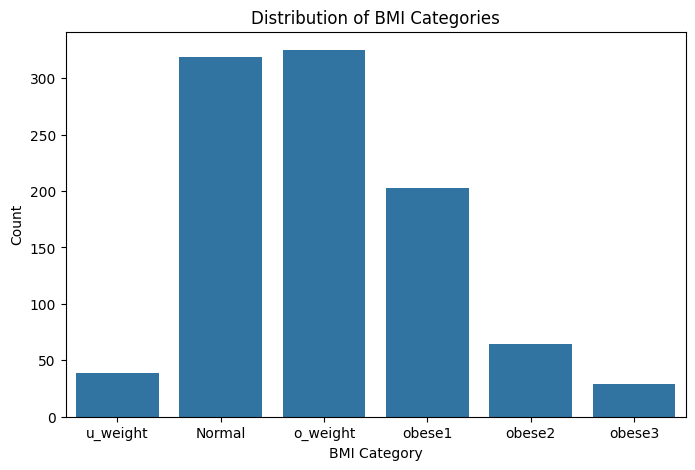

In [15]:
# Create BMI bins for better visualization
df['BMI_Binned'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.999, 29.999,34.999, 39.999, 44.999], labels=['u_weight', 'Normal', 'o_weight', 'obese1', 'obese2', 'obese3'])

# Plot column chart for BMI categories
plt.figure(figsize=(8, 5))
sns.countplot(x='BMI_Binned', data=df, order=['u_weight', 'Normal', 'o_weight', 'obese1', 'obese2', 'obese3'])
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

### Hypothesis Testing

In [17]:
# Separate premium costs based on the presence of chronic diseases
with_chronic = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
without_chronic = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']

# Perform an independent t-test
t_stat, p_value = ttest_ind(with_chronic, without_chronic, equal_var=False)

print("Hypothesis Test : Chronic Diseases and Premium Costs")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. Premium costs are significantly different for individuals with and without chronic diseases.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in premium costs for individuals with and without chronic diseases.")
    

Hypothesis Test : Chronic Diseases and Premium Costs
T-statistic: 7.7077, P-value: 0.0000
Result: Reject the null hypothesis. Premium costs are significantly different for individuals with and without chronic diseases.


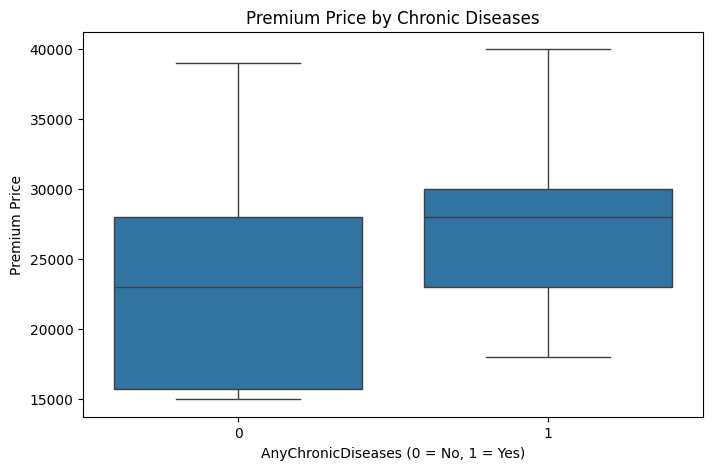

In [18]:
# Boxplot for AnyChronicDiseases and PremiumPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df)
plt.title('Premium Price by Chronic Diseases')
plt.xlabel('AnyChronicDiseases (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [19]:
# Separate premium costs based on Diabetes
group1 = df[df['Diabetes'] == 0]['PremiumPrice']  # Group without diabetes
group2 = df[df['Diabetes'] == 1]['PremiumPrice']  # Group with diabetes

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: Diabetes and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: Diabetes and Premium Price
T-statistic: -2.4489, P-value: 0.0145
Result: Significant difference in premium prices between groups.



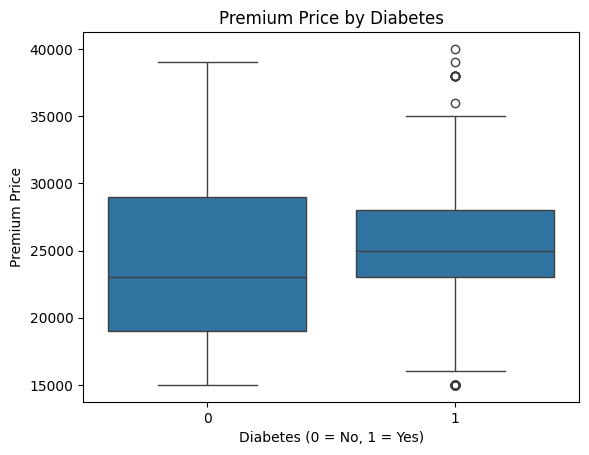

In [20]:
# Boxplot for Diabetes and Premium Price
sns.boxplot(x='Diabetes', y='PremiumPrice', data=df)
plt.title('Premium Price by Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [21]:
# Separate premium costs based on Blood Pressure Problems
group1 = df[df['BloodPressureProblems'] == 0]['PremiumPrice']  # Group without blood pressure problems
group2 = df[df['BloodPressureProblems'] == 1]['PremiumPrice']  # Group with blood pressure problems

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: BloodPressureProblems and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: BloodPressureProblems and Premium Price
T-statistic: -5.3703, P-value: 0.0000
Result: Significant difference in premium prices between groups.



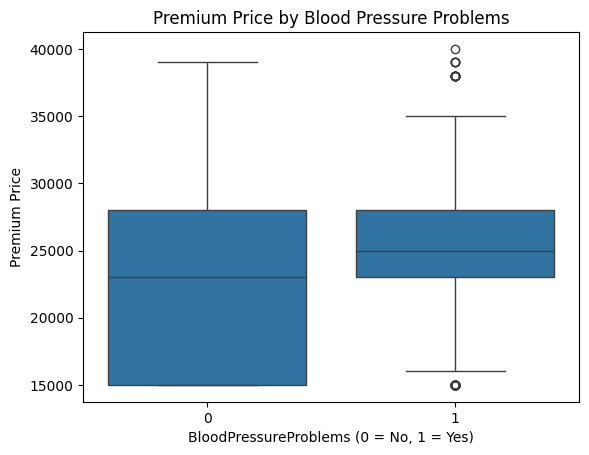

In [22]:
# Boxplot for BloodPressureProblems and PremiumPrice
sns.boxplot(x='BloodPressureProblems', y='PremiumPrice', data=df)
plt.title('Premium Price by Blood Pressure Problems')
plt.xlabel('BloodPressureProblems (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [23]:
# Separate premium costs based on Any Transplants
group1 = df[df['AnyTransplants'] == 0]['PremiumPrice']  # Group without transplants
group2 = df[df['AnyTransplants'] == 1]['PremiumPrice']  # Group with transplants

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: AnyTransplants and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: AnyTransplants and Premium Price
T-statistic: -6.2599, P-value: 0.0000
Result: Significant difference in premium prices between groups.



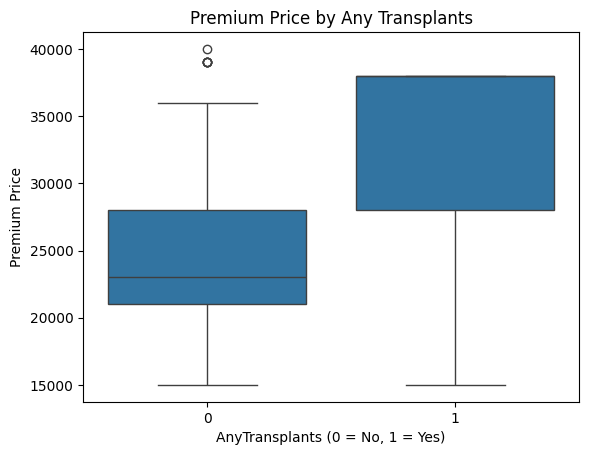

In [24]:
# Boxplot for AnyTransplants and PremiumPrice
sns.boxplot(x='AnyTransplants', y='PremiumPrice', data=df)
plt.title('Premium Price by Any Transplants')
plt.xlabel('AnyTransplants (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()


In [25]:
# Separate premium costs based on Known Allergies
group1 = df[df['KnownAllergies'] == 0]['PremiumPrice']  # Group without allergies
group2 = df[df['KnownAllergies'] == 1]['PremiumPrice']  # Group with allergies

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: KnownAllergies and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: KnownAllergies and Premium Price
T-statistic: -0.3667, P-value: 0.7141
Result: No significant difference in premium prices between groups.



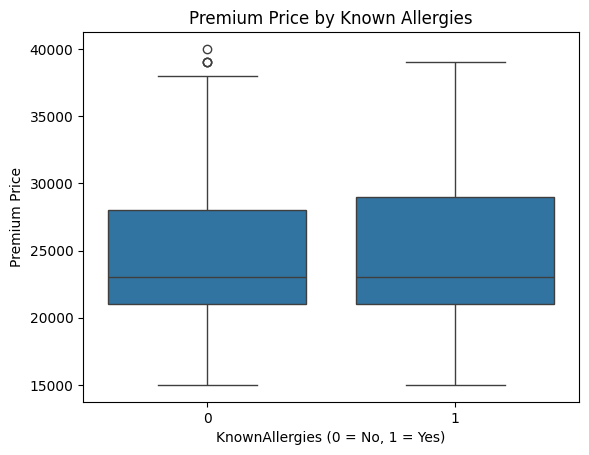

In [26]:
# Boxplot for KnownAllergies and PremiumPrice
sns.boxplot(x='KnownAllergies', y='PremiumPrice', data=df)
plt.title('Premium Price by Known Allergies')
plt.xlabel('KnownAllergies (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [27]:
# Separate premium costs based on History of Cancer in Family
group1 = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']  # Group without family history of cancer
group2 = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']  # Group with family history of cancer

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: HistoryOfCancerInFamily and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: HistoryOfCancerInFamily and Premium Price
T-statistic: -2.3568, P-value: 0.0198
Result: Significant difference in premium prices between groups.



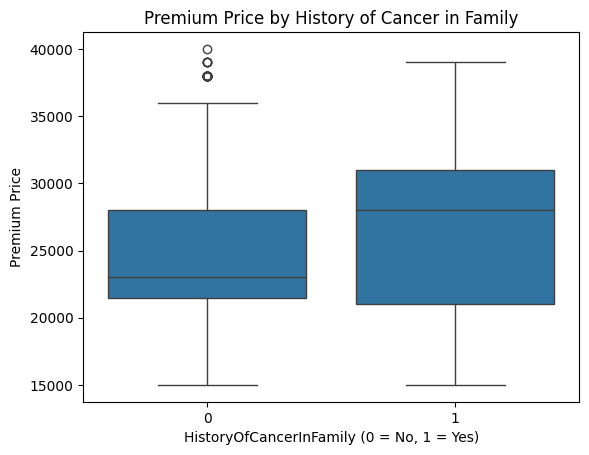

In [28]:
# Boxplot for HistoryOfCancerInFamily and PremiumPrice
sns.boxplot(x='HistoryOfCancerInFamily', y='PremiumPrice', data=df)
plt.title('Premium Price by History of Cancer in Family')
plt.xlabel('HistoryOfCancerInFamily (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [29]:
# Group premium costs by the number of surgeries
grouped_by_surgeries = [df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in range(4)]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_by_surgeries)

print("\nHypothesis Test : Number of Surgeries and Premium Costs")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. Premium costs vary significantly based on the number of surgeries.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in premium costs based on the number of surgeries.")


Hypothesis Test : Number of Surgeries and Premium Costs
F-statistic: 26.1354, P-value: 0.0000
Result: Reject the null hypothesis. Premium costs vary significantly based on the number of surgeries.


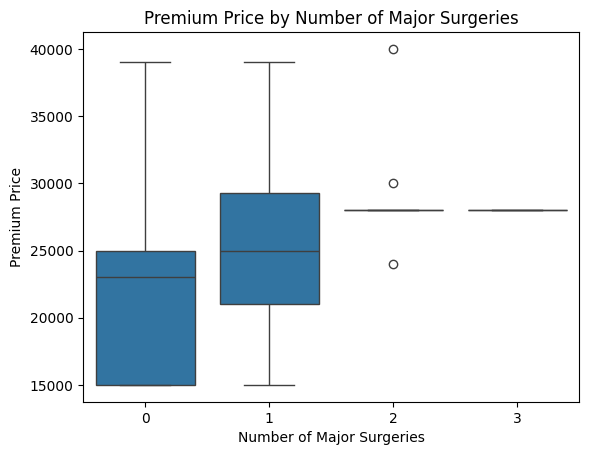

In [30]:
# Boxplot for Number of Major Surgeries and Premium Price
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df)
plt.title('Premium Price by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Premium Price')
plt.show()

In [31]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(df['Age'], df['PremiumPrice'])

print("\nHypothesis Test : Age and Premium Costs")
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. Age is significantly correlated with premium costs.")
else:
    print("Result: Fail to reject the null hypothesis. No significant correlation between age and premium costs.")



Hypothesis Test : Age and Premium Costs
Pearson Correlation Coefficient: 0.6975, P-value: 0.0000
Result: Reject the null hypothesis. Age is significantly correlated with premium costs.


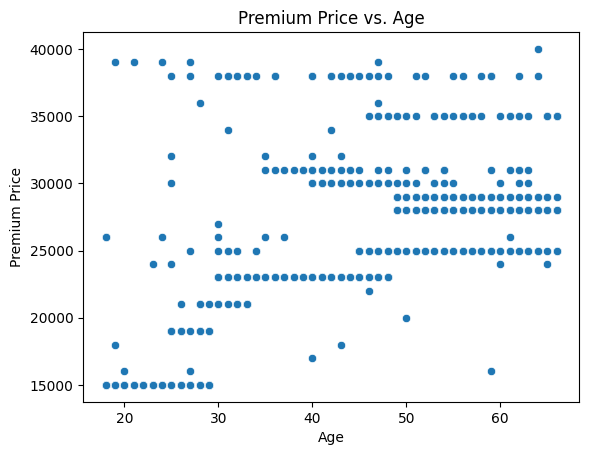

In [32]:
# Scatterplot for Age and Premium Price
sns.scatterplot(x='Age', y='PremiumPrice', data=df)
plt.title('Premium Price vs. Age')
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.show()

In [33]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(df['Height'], df['PremiumPrice'])

print("Hypothesis Test: Height and Premium Price")
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant correlation between Height and PremiumPrice.\n")
else:
    print("Result: No significant correlation between Height and PremiumPrice.\n")


Hypothesis Test: Height and Premium Price
Pearson Correlation Coefficient: 0.0269, P-value: 0.3986
Result: No significant correlation between Height and PremiumPrice.



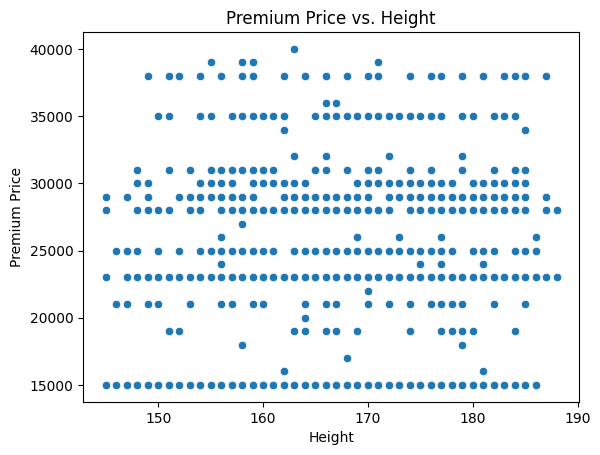

In [34]:
# Scatterplot for Height and Premium Price
sns.scatterplot(x='Height', y='PremiumPrice', data=df)
plt.title('Premium Price vs. Height')
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.show()


In [35]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(df['Weight'], df['PremiumPrice'])

print("Hypothesis Test: Weight and Premium Price")
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant correlation between Weight and PremiumPrice.\n")
else:
    print("Result: No significant correlation between Weight and PremiumPrice.\n")


Hypothesis Test: Weight and Premium Price
Pearson Correlation Coefficient: 0.1415, P-value: 0.0000
Result: Significant correlation between Weight and PremiumPrice.



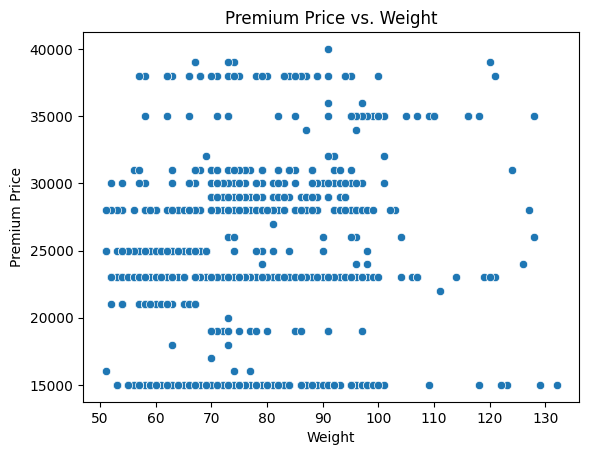

In [36]:
# Scatterplot for Weight and Premium Price
sns.scatterplot(x='Weight', y='PremiumPrice', data=df)
plt.title('Premium Price vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.show()

In [37]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Binned
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,o_weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,obese1


In [38]:
# Move 'PremiumPrice' to the last column
target_column = 'PremiumPrice'
columns = [col for col in df.columns if col != target_column] + [target_column]
df = df[columns]

In [39]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMI_Binned,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,23.725286,Normal,25000
1,60,1,0,0,0,180,73,0,0,0,22.530864,Normal,29000
2,36,1,1,0,0,158,59,0,0,1,23.634033,Normal,23000
3,52,1,1,0,1,183,93,0,0,2,27.770313,o_weight,28000
4,38,0,0,0,1,166,88,0,0,1,31.934969,obese1,23000


In [40]:
df1=df.copy()

In [41]:
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMI_Binned,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,23.725286,Normal,25000
1,60,1,0,0,0,180,73,0,0,0,22.530864,Normal,29000
2,36,1,1,0,0,158,59,0,0,1,23.634033,Normal,23000
3,52,1,1,0,1,183,93,0,0,2,27.770313,o_weight,28000
4,38,0,0,0,1,166,88,0,0,1,31.934969,obese1,23000


In [42]:
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMI_Binned,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,23.725286,Normal,25000
1,60,1,0,0,0,180,73,0,0,0,22.530864,Normal,29000
2,36,1,1,0,0,158,59,0,0,1,23.634033,Normal,23000
3,52,1,1,0,1,183,93,0,0,2,27.770313,o_weight,28000
4,38,0,0,0,1,166,88,0,0,1,31.934969,obese1,23000


In [43]:
# Drop the BMI_Binned feature in place
df1.drop(columns=['BMI_Binned','BMI'], inplace=True)

In [44]:
correlation_matrix = df1.corr()

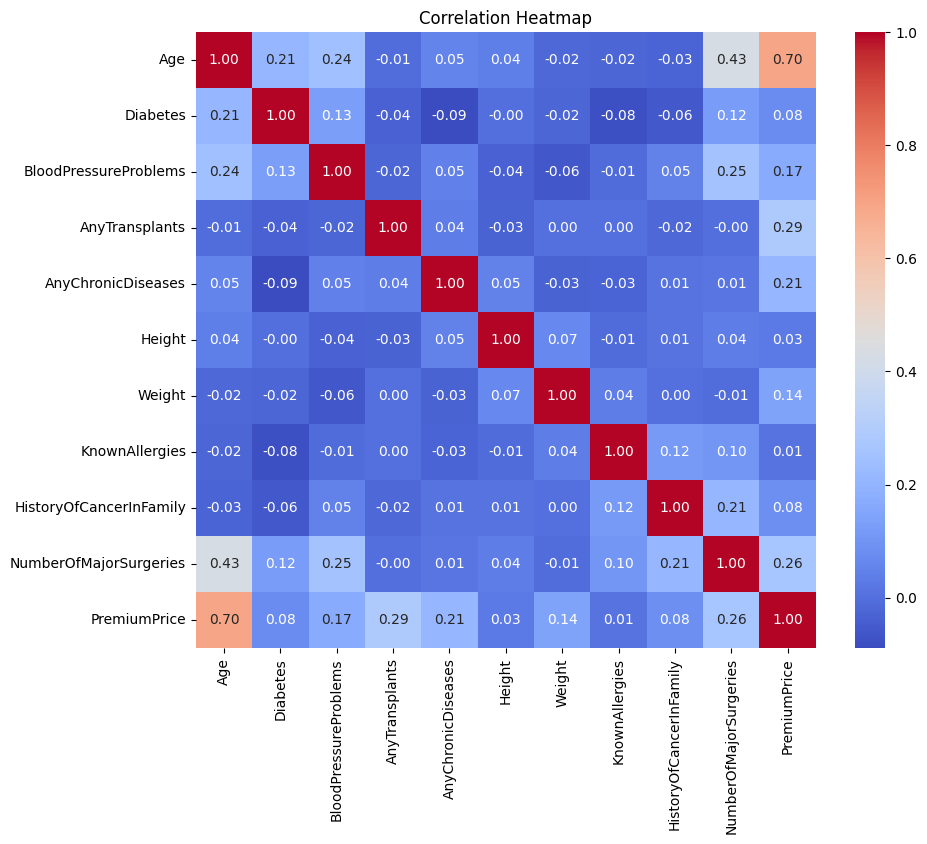

In [45]:
# Plot the normalized correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# List of numerical features to normalize
numerical_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

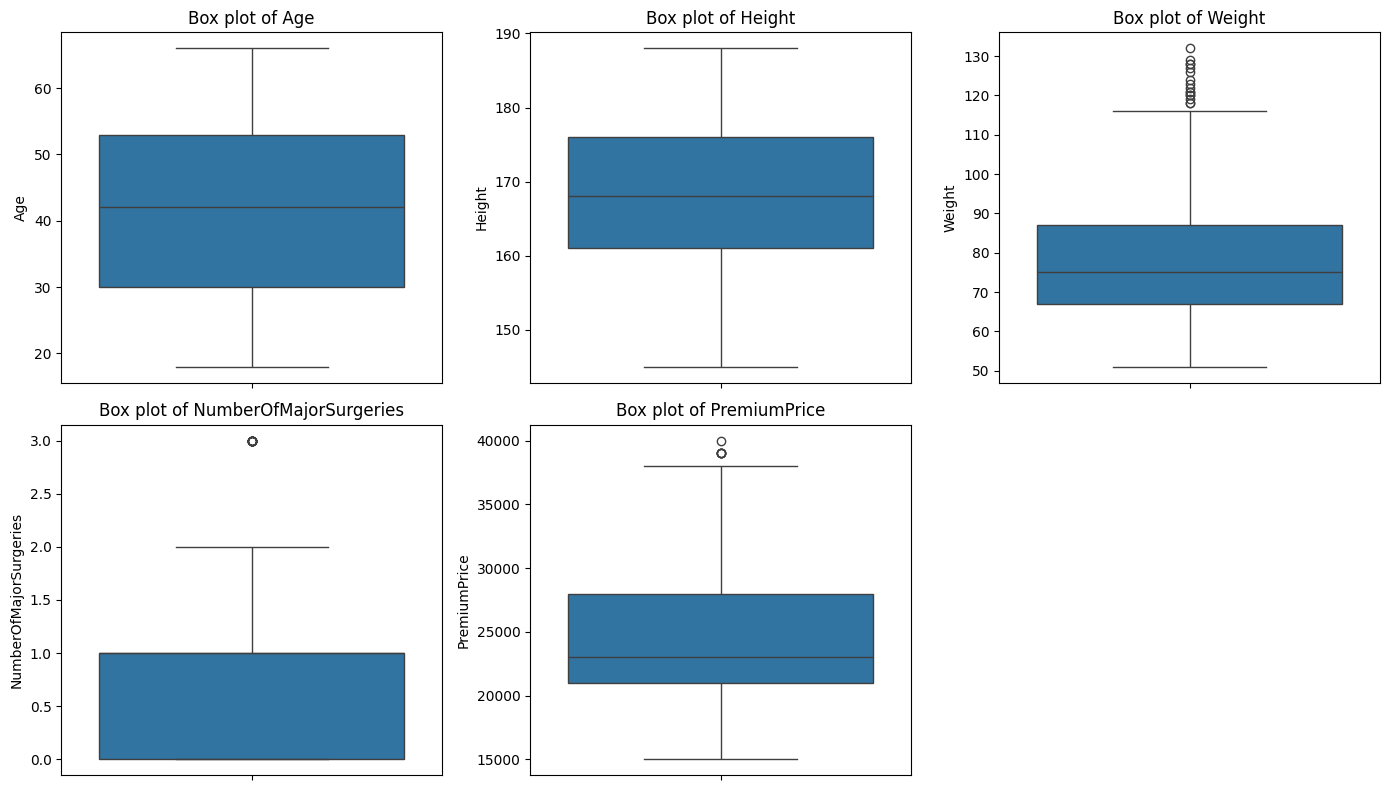

In [47]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=df1[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [48]:
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [50]:
# Split features and target
X = df1.iloc[:, :-1]  # All columns except the target
y = df1.iloc[:, -1]   # Target column

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50-50 split for val/test


In [51]:
# Print dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (690, 10) (690,)
Validation Set: (148, 10) (148,)
Test Set: (148, 10) (148,)


In [52]:

X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
398,66,1,1,0,0,163,70,0,0,2
523,35,0,1,0,0,169,86,0,0,0
809,48,0,0,0,1,161,95,0,0,1
501,26,0,0,0,1,184,73,0,0,1
430,58,1,1,0,0,159,62,0,0,0


In [53]:
y_train.head()

398    28000
523    23000
809    35000
501    19000
430    25000
Name: PremiumPrice, dtype: int64

In [54]:
X_val.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
33,26,0,0,0,0,154,88,0,0,0
355,65,1,0,0,0,158,67,0,0,2
767,59,0,1,0,0,162,60,0,0,2
961,59,1,1,0,0,154,66,0,1,1
980,40,0,1,1,0,171,74,0,0,0


In [55]:
y_val.head()

33     15000
355    28000
767    28000
961    25000
980    38000
Name: PremiumPrice, dtype: int64

In [56]:
X_test.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
713,57,0,1,0,1,179,95,1,0,1
814,47,0,0,0,1,177,73,1,0,1
96,34,0,1,0,0,162,74,0,0,1
712,59,0,1,0,0,173,62,0,0,1
705,50,1,0,0,0,176,98,1,0,0


In [57]:
y_test.head()

713    35000
814    30000
96     23000
712    25000
705    35000
Name: PremiumPrice, dtype: int64

In [58]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Verify scaled data
print("\nSample Normalized Training Data (0-1 range):")
print(X_train_scaled[:5])


Sample Normalized Training Data (0-1 range):
[[1.         1.         1.         0.         0.         0.42857143
  0.2345679  0.         0.         0.66666667]
 [0.35416667 0.         1.         0.         0.         0.57142857
  0.43209877 0.         0.         0.        ]
 [0.625      0.         0.         0.         1.         0.38095238
  0.54320988 0.         0.         0.33333333]
 [0.16666667 0.         0.         0.         1.         0.92857143
  0.27160494 0.         0.         0.33333333]
 [0.83333333 1.         1.         0.         0.         0.33333333
  0.13580247 0.         0.         0.        ]]


### Simple linear regression

In [61]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)


In [62]:
# Display metrics of simple linear regression
print("\nValidation Dataset Performance of simple linear regression:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Validation Dataset Performance of simple linear regression:
Mean Absolute Error (MAE): 2883.81
Root Mean Squared Error (RMSE): 3976.19
R-squared (R²): 0.64


In [63]:
# Predict on training set
y_train_pred = lr_model.predict(X_train_scaled)


In [64]:
# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

In [65]:
print("\nTraining Dataset Performance of simple linear regression:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")


Training Dataset Performance of simple linear regression:
Mean Absolute Error (MAE): 2699.63
Root Mean Squared Error (RMSE): 3821.12
R-squared (R²): 0.60


## Polynomial regression:

In [67]:
# Initialize PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training, validation, and test datasets
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Check the shape of transformed features
print("Original number of features:", X_train.shape[1])
print("Number of features after polynomial transformation:", X_train_poly.shape[1])

Original number of features: 10
Number of features after polynomial transformation: 65


In [68]:
# Initialize and train the model
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

# Print coefficients and intercept
print("Intercept:", poly_lr_model.intercept_)
print("Number of Coefficients:", len(poly_lr_model.coef_))

Intercept: 15414.091787439616
Number of Coefficients: 65


In [69]:
# Predict on training and validation sets
y_train_pred_poly = poly_lr_model.predict(X_train_poly)
y_val_pred_poly = poly_lr_model.predict(X_val_poly)

# Training set performance
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
rmse_train_poly = mean_squared_error(y_train, y_train_pred_poly, squared=False)
r2_train_poly = r2_score(y_train, y_train_pred_poly)

# Validation set performance
mae_val_poly = mean_absolute_error(y_val, y_val_pred_poly)
rmse_val_poly = mean_squared_error(y_val, y_val_pred_poly, squared=False)
r2_val_poly = r2_score(y_val, y_val_pred_poly)

In [70]:
# Display results
print("\nTraining Dataset Performance with Polynomial Regression:")
print(f"Mean Absolute Error (MAE): {mae_train_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_poly:.2f}")
print(f"R-squared (R²): {r2_train_poly:.2f}")


Training Dataset Performance with Polynomial Regression:
Mean Absolute Error (MAE): 2174.52
Root Mean Squared Error (RMSE): 3216.79
R-squared (R²): 0.72


In [71]:
print("\nValidation Dataset Performance with Polynomial Regression:")
print(f"Mean Absolute Error (MAE): {mae_val_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_poly:.2f}")
print(f"R-squared (R²): {r2_val_poly:.2f}")


Validation Dataset Performance with Polynomial Regression:
Mean Absolute Error (MAE): 2632.63
Root Mean Squared Error (RMSE): 3916.38
R-squared (R²): 0.65


In [72]:
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(X_train_poly, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_val_pred_ridge = ridge_model.predict(X_val_poly)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
# Display R² scores
print("\nR² Scores for Ridge Regression:")
print(f"Training Dataset R²: {r2_train_ridge:.2f}")
print(f"Validation Dataset R²: {r2_val_ridge:.2f}")


R² Scores for Ridge Regression:
Training Dataset R²: 0.70
Validation Dataset R²: 0.65


In [73]:
# Hyperparameter tuning

param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train_poly, y_train)

print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best R² from CV:", ridge_cv.best_score_)

Best alpha: 1
Best R² from CV: 0.6271552317662455


In [74]:
# Use the best model from GridSearchCV
ridge_best = ridge_cv.best_estimator_

# Predict on the test set
y_test_pred = ridge_best.predict(X_test_poly)

# Evaluate on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

In [75]:
print("\nTest Dataset Performance:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


Test Dataset Performance:
Mean Absolute Error (MAE): 2118.16
Root Mean Squared Error (RMSE): 2838.17
R-squared (R²): 0.81


## Random forest regressor

In [77]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # Allow trees to grow fully
    random_state=42,    # For reproducibility
    min_samples_split=2,  # Minimum samples to split a node
    min_samples_leaf=1    # Minimum samples per leaf
)

# Train the model
rf_model.fit(X_train_poly, y_train)

# Predict on training and validation sets
y_train_pred_rf = rf_model.predict(X_train_poly)
y_val_pred_rf = rf_model.predict(X_val_poly)

# Evaluate training performance
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Evaluate validation performance
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_val_rf = mean_squared_error(y_val, y_val_pred_rf, squared=False)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

In [78]:
# Display results
print("\nTraining Dataset Performance (Random Forest):")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf:.2f}")
print(f"R-squared (R²): {r2_train_rf:.2f}")

print("\nValidation Dataset Performance (Random Forest):")
print(f"Mean Absolute Error (MAE): {mae_val_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_rf:.2f}")
print(f"R-squared (R²): {r2_val_rf:.2f}")


Training Dataset Performance (Random Forest):
Mean Absolute Error (MAE): 516.43
Root Mean Squared Error (RMSE): 1162.73
R-squared (R²): 0.96

Validation Dataset Performance (Random Forest):
Mean Absolute Error (MAE): 1584.39
Root Mean Squared Error (RMSE): 3389.03
R-squared (R²): 0.74


In [79]:
# Hyperparameter tuning

In [80]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_cv = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV
rf_cv.fit(X_train_poly, y_train)

# Get best parameters and model
print("Best parameters:", rf_cv.best_params_)
rf_best = rf_cv.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [81]:
# Evaluate the best model on validation set
y_val_pred_rf_best = rf_best.predict(X_val_poly)
r2_val_rf_best = r2_score(y_val, y_val_pred_rf_best)
print("Validation R² with best Random Forest model:", r2_val_rf_best)



Validation R² with best Random Forest model: 0.7876559958299485


In [82]:
# Predict on the test set
y_test_pred_rf = rf_best.predict(X_test_poly)

# Evaluate test performance
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("\nTest Dataset Performance (Random Forest):")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rf:.2f}")
print(f"R-squared (R²): {r2_test_rf:.2f}")


Test Dataset Performance (Random Forest):
Mean Absolute Error (MAE): 933.14
Root Mean Squared Error (RMSE): 1717.58
R-squared (R²): 0.93


In [83]:
# Predict on the training set
y_train_pred_rf = rf_best.predict(X_train_poly)

# Calculate R² score
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"R² Score on Training Dataset (Random Forest): {r2_train_rf:.2f}")

R² Score on Training Dataset (Random Forest): 0.89


## GBDT regressor

In [85]:
# Initialize the GBDT Regressor
gbdt_model = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual trees
    random_state=42
)

# Train the GBDT model on the training data
gbdt_model.fit(X_train_poly, y_train)

# Predict on training and validation datasets
y_train_pred_gbdt = gbdt_model.predict(X_train_poly)
y_val_pred_gbdt = gbdt_model.predict(X_val_poly)

# Evaluate Training Performance
mae_train_gbdt = mean_absolute_error(y_train, y_train_pred_gbdt)
rmse_train_gbdt = mean_squared_error(y_train, y_train_pred_gbdt, squared=False)
r2_train_gbdt = r2_score(y_train, y_train_pred_gbdt)

# Evaluate Validation Performance
mae_val_gbdt = mean_absolute_error(y_val, y_val_pred_gbdt)
rmse_val_gbdt = mean_squared_error(y_val, y_val_pred_gbdt, squared=False)
r2_val_gbdt = r2_score(y_val, y_val_pred_gbdt)

# Display results
print("\nTraining Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_train_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_gbdt:.2f}")
print(f"R-squared (R²): {r2_train_gbdt:.2f}")

print("\nValidation Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_val_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_gbdt:.2f}")
print(f"R-squared (R²): {r2_val_gbdt:.2f}")



Training Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1125.55
Root Mean Squared Error (RMSE): 1936.23
R-squared (R²): 0.90

Validation Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1901.94
Root Mean Squared Error (RMSE): 3513.72
R-squared (R²): 0.72


In [86]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gbdt_cv = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
gbdt_cv.fit(X_train_poly, y_train)

# Get best parameters and model
print("Best parameters:", gbdt_cv.best_params_)
gbdt_best = gbdt_cv.best_estimator_

# Evaluate the best model on validation set
y_val_pred_gbdt_best = gbdt_best.predict(X_val_poly)
r2_val_gbdt_best = r2_score(y_val, y_val_pred_gbdt_best)
print("Validation R² with best GBDT model:", r2_val_gbdt_best)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Validation R² with best GBDT model: 0.7547374532913377


In [87]:
# Predict on the test set
y_test_pred_gbdt = gbdt_best.predict(X_test_poly)

# Evaluate test performance
mae_test_gbdt = mean_absolute_error(y_test, y_test_pred_gbdt)
rmse_test_gbdt = mean_squared_error(y_test, y_test_pred_gbdt, squared=False)
r2_test_gbdt = r2_score(y_test, y_test_pred_gbdt)

print("\nTest Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_test_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_gbdt:.2f}")
print(f"R-squared (R²): {r2_test_gbdt:.2f}")



Test Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1305.85
Root Mean Squared Error (RMSE): 1864.77
R-squared (R²): 0.92


In [88]:
# Get feature importances
feature_importances = rf_best.feature_importances_
feature_names = poly.get_feature_names_out(X_train.columns)  # For polynomial features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Important Features:")
print(importance_df.head(10))



Top 10 Important Features:
                              Feature  Importance
10                              Age^2    0.326036
0                                 Age    0.276011
16                         Age Weight    0.064290
40              AnyTransplants Weight    0.028744
13                 Age AnyTransplants    0.027975
14             Age AnyChronicDiseases    0.025659
39              AnyTransplants Height    0.024826
38  AnyTransplants AnyChronicDiseases    0.022935
55                           Weight^2    0.020195
18        Age HistoryOfCancerInFamily    0.019069


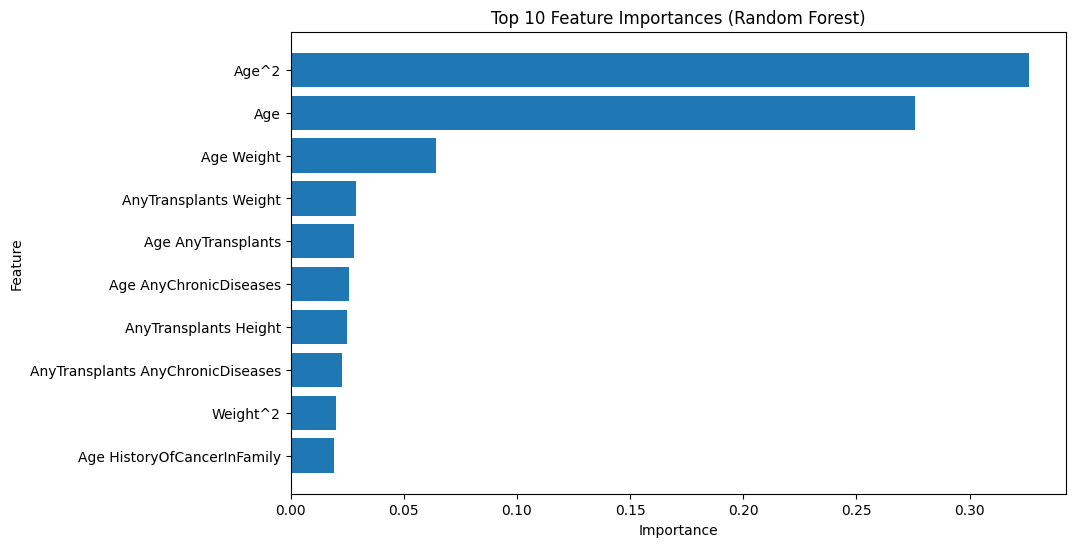

In [89]:
# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])  # Reverse for descending order
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [90]:
# Save feature importances to a CSV file
importance_df.to_csv('feature_importances_rf.csv', index=False)
print("Feature importances saved to 'feature_importances_rf.csv'.")

Feature importances saved to 'feature_importances_rf.csv'.


In [91]:
# Save the model and transformer in a single file
with open('random_forest_with_poly1.pkl', 'wb') as file:
    pickle.dump({'model': rf_best, 'poly_transformer': poly}, file)

print("Model and transformer saved as 'random_forest_with_poly1.pkl'.")

Model and transformer saved as 'random_forest_with_poly1.pkl'.


## Residual analysis

In [93]:
# Predict on the test set using rf_best
y_test_pred_rf = rf_best.predict(X_test_poly)

# Calculate residuals
residuals_rf = y_test - y_test_pred_rf

# Combine actuals, predictions, and residuals into a DataFrame for analysis
import pandas as pd
residuals_df_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_rf,
    'Residual': residuals_rf
})

In [94]:
print("\nSummary Statistics of Residuals (Random Forest):")
print(residuals_rf.describe())


Summary Statistics of Residuals (Random Forest):
count     148.000000
mean     -102.163266
std      1720.356451
min     -9654.879468
25%      -433.831249
50%       -45.507056
75%       143.172464
max      5807.366507
Name: PremiumPrice, dtype: float64


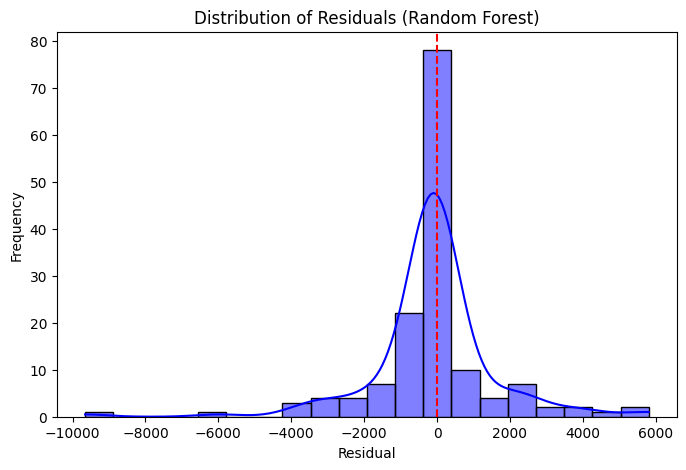

In [95]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=20, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

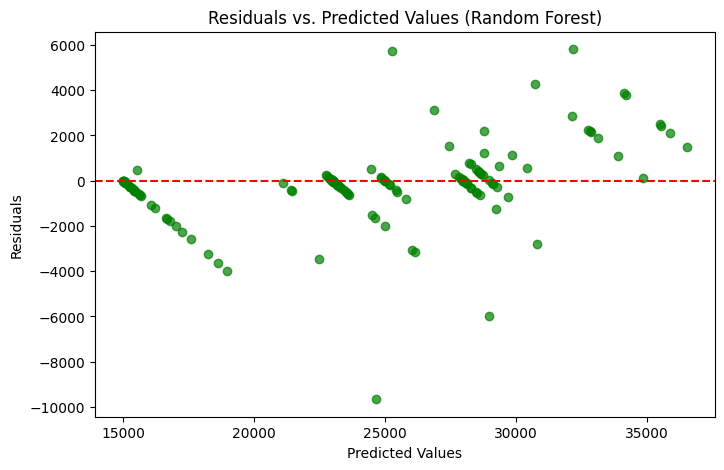

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

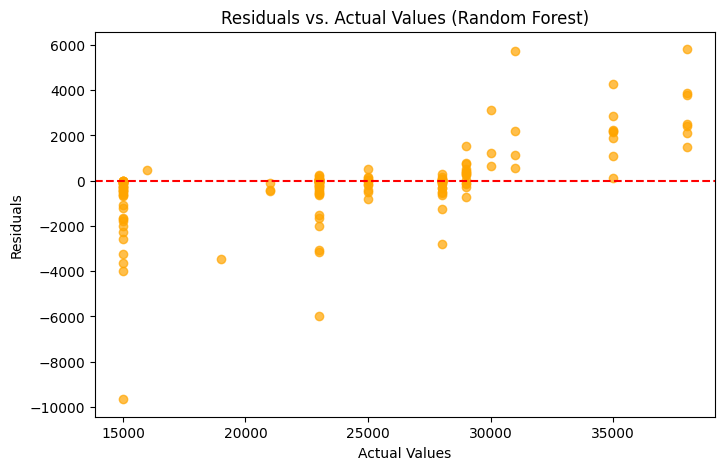

In [97]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_rf, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [98]:
# Identify the top residuals
top_residuals_rf = residuals_df_rf.sort_values(by='Residual', key=abs, ascending=False).head(30)

print("\nTop 10 Largest Residuals (Random Forest):")
print(top_residuals_rf)


Top 10 Largest Residuals (Random Forest):
     Actual     Predicted     Residual
761   15000  24654.879468 -9654.879468
158   23000  28995.313943 -5995.313943
922   38000  32192.633493  5807.366507
88    31000  25282.911970  5717.088030
682   35000  30725.441135  4274.558865
82    15000  18985.826840 -3985.826840
715   38000  34123.115176  3876.884824
938   38000  34196.554883  3803.445117
65    15000  18629.298202 -3629.298202
604   19000  22478.447950 -3478.447950
70    15000  18244.064685 -3244.064685
244   23000  26141.940043 -3141.940043
381   30000  26887.736205  3112.263795
260   23000  26053.573865 -3053.573865
858   35000  32162.140276  2837.859724
453   28000  30819.400753 -2819.400753
981   15000  17588.046272 -2588.046272
314   38000  35505.830011  2494.169989
670   38000  35569.035874  2430.964126
468   15000  17271.333791 -2271.333791
198   35000  32757.874293  2242.125707
680   31000  28793.396601  2206.603399
713   35000  32826.820064  2173.179936
306   35000  32868.92

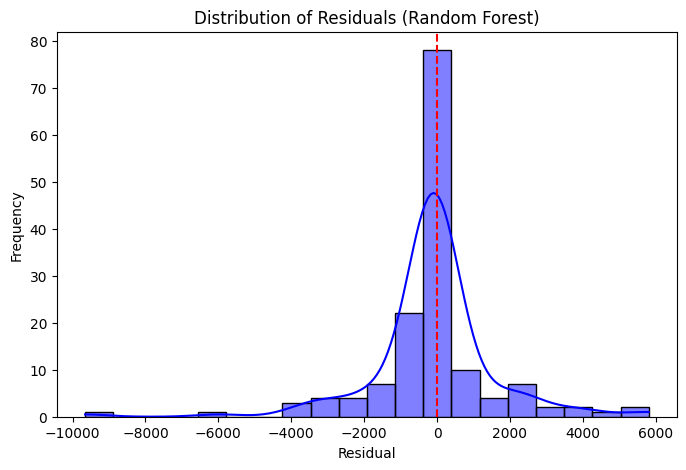

In [99]:
# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=20, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

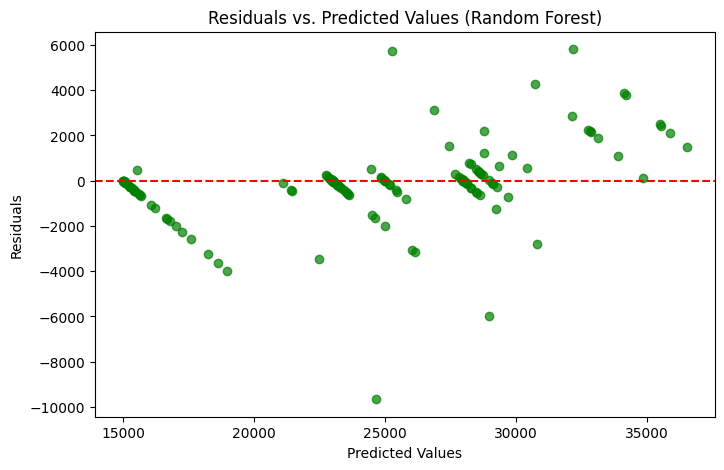

In [100]:
# Residuals vs. Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


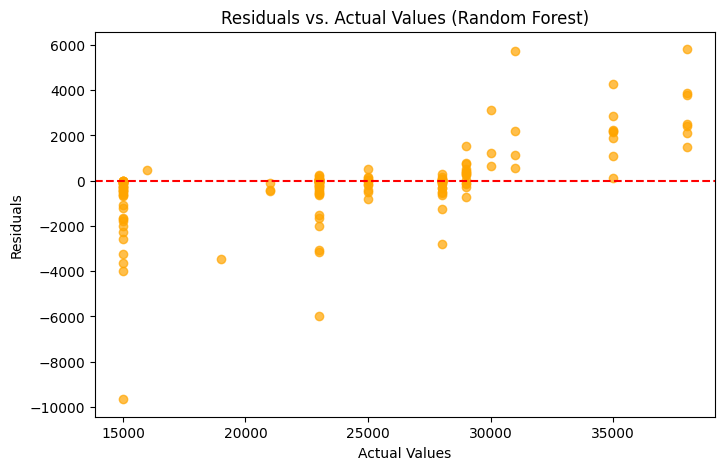

In [101]:
# Residuals vs. Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_rf, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

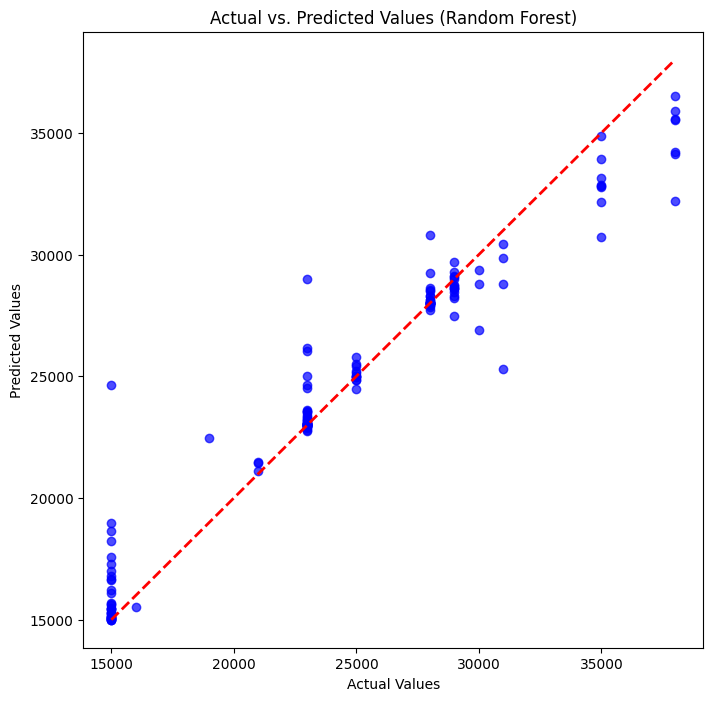

In [102]:
# Actual vs. Predicted Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

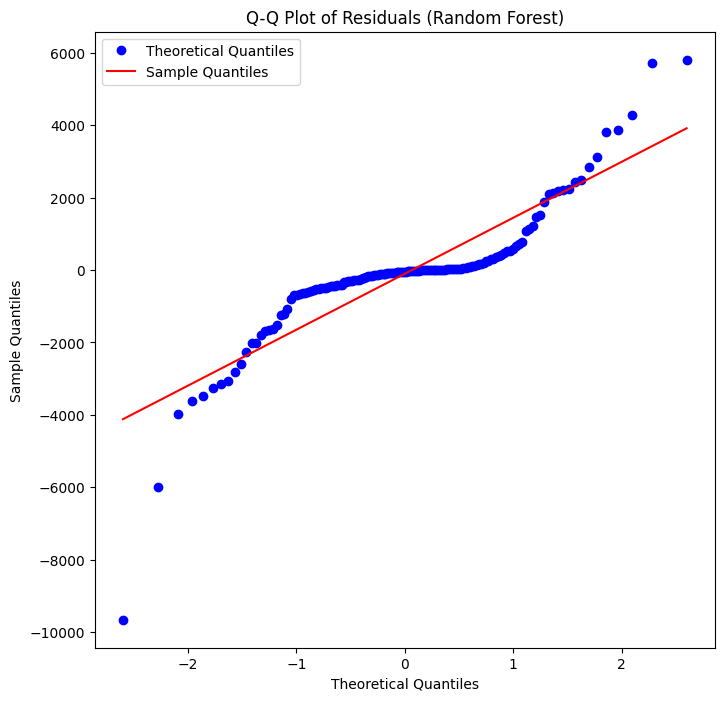

In [103]:
import scipy.stats as stats

# Q-Q plot for residuals
plt.figure(figsize=(8, 8))
res = stats.probplot(residuals_rf, dist="norm", plot=plt)

# Add a legend
plt.legend(["Theoretical Quantiles", "Sample Quantiles"], loc="best")
plt.title('Q-Q Plot of Residuals (Random Forest)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [104]:
# pip install shap

In [105]:
import shap

In [106]:
# Initialize the SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_best)


In [107]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_poly)


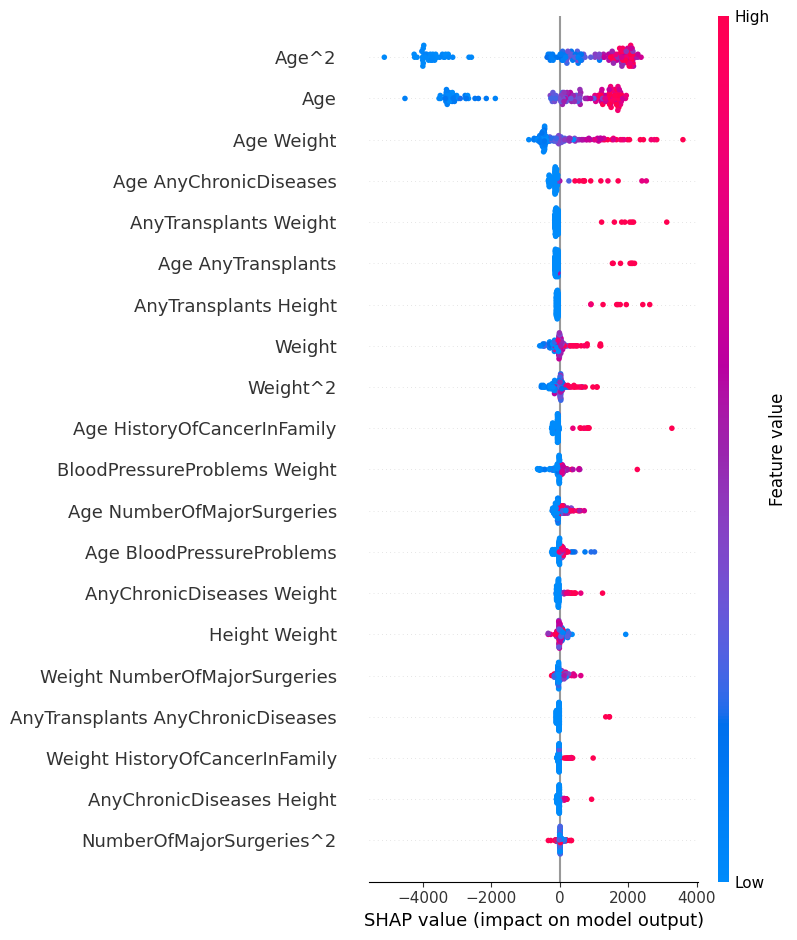

In [108]:
# Visualize global feature importance (summary plot)
shap.summary_plot(shap_values, X_test_poly, feature_names=poly.get_feature_names_out(X_train.columns))

In [109]:
shap.initjs()


In [110]:
# Select a specific test instance
instance = X_test_poly[0].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[0],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [111]:
# Select a specific test instance
instance = X_test_poly[1].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[1],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [112]:
# Select a specific test instance
instance = X_test_poly[2].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[2],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [113]:
# Select a specific test instance
instance = X_test_poly[10].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[10],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [114]:
# Select a specific test instance
instance = X_test_poly[100].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[100],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [115]:
# Select a specific test instance
instance = X_test_poly[20].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[20],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [116]:
# Select a specific test instance
instance = X_test_poly[30].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[30],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [117]:
# Select a specific test instance
instance = X_test_poly[40].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[40],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [118]:
# Initialize SHAP JavaScript
shap.initjs()

# Loop through all instances in the test dataset
for i in range(len(X_test_poly)):
    # Select a specific instance
    instance = X_test_poly[i].reshape(1, -1)

    # Generate SHAP values for this instance
    shap_values_instance = explainer.shap_values(instance)

    # Visualize feature contributions for this instance
    shap.force_plot(
        explainer.expected_value,
        shap_values_instance[0],  # SHAP values for the instance
        poly.get_feature_names_out(X_train.columns)
    )


In [119]:
# # Loop through all instances in the test dataset
# for i in range(len(X_test_poly)):
#     # Select a specific instance
#     instance = X_test_poly[i].reshape(1, -1)

#     # Generate SHAP values for this instance
#     shap_values_instance = explainer.shap_values(instance)

#     # Generate force plot for the instance
#     force_plot = shap.force_plot(
#         explainer.expected_value,
#         shap_values_instance[0],  # SHAP values for the instance
#         poly.get_feature_names_out(X_train.columns)
#     )

#     # Save the plot as an HTML file
#     filename = f"force_plot_instance_{i}.html"
#     shap.save_html(filename, force_plot)
#     print(f"Force plot for instance {i} saved as '{filename}'.")


### Advanced Hyperparameter Tuning for Ridge Regression

In [121]:
# Define a wider parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization strengths
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solvers supported by Ridge
}

In [122]:
# Initialize Ridge Regression model
ridge_model = Ridge()

# Set up GridSearchCV
ridge_cv = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='r2',   # Use R² as the evaluation metric
    cv=5,           # 5-fold cross-validation
    verbose=1,      # Display progress
    n_jobs=-1       # Use all available cores
)

# Fit GridSearchCV on the training data
ridge_cv.fit(X_train_poly, y_train)

# Get the best hyperparameters and the corresponding R² score
best_params = ridge_cv.best_params_
best_r2 = ridge_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R² from cross-validation: {best_r2:.4f}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'alpha': 1, 'solver': 'lsqr'}
Best R² from cross-validation: 0.6272


In [123]:
# Get the best model
ridge_best = ridge_cv.best_estimator_

# Predict on the validation set
y_val_pred_ridge = ridge_best.predict(X_val_poly)

# Evaluate performance
mae_val = mean_absolute_error(y_val, y_val_pred_ridge)
rmse_val = mean_squared_error(y_val, y_val_pred_ridge, squared=False)
r2_val = r2_score(y_val, y_val_pred_ridge)

print("\nValidation Dataset Performance (Best Ridge Model):")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared (R²): {r2_val:.4f}")


Validation Dataset Performance (Best Ridge Model):
Mean Absolute Error (MAE): 2692.64
Root Mean Squared Error (RMSE): 3959.57
R-squared (R²): 0.6456


In [124]:
# Predict on the test set
y_test_pred_ridge = ridge_best.predict(X_test_poly)

# Evaluate test performance
mae_test = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_test = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
r2_test = r2_score(y_test, y_test_pred_ridge)

print("\nTest Dataset Performance (Best Ridge Model):")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.4f}")


Test Dataset Performance (Best Ridge Model):
Mean Absolute Error (MAE): 2117.52
Root Mean Squared Error (RMSE): 2837.09
R-squared (R²): 0.8125


In [125]:
# Predict on the training set
y_train_pred_ridge = ridge_best.predict(X_train_poly)

# Calculate metrics
r2_train = r2_score(y_train, y_train_pred_ridge)
mae_train = mean_absolute_error(y_train, y_train_pred_ridge)
rmse_train = mean_squared_error(y_train, y_train_pred_ridge, squared=False)

# Display results
print("\nTraining Dataset Performance (Best Ridge Model):")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")


Training Dataset Performance (Best Ridge Model):
R-squared (R²): 0.7033
Mean Absolute Error (MAE): 2277.83
Root Mean Squared Error (RMSE): 3305.54


In [126]:
# Create a DataFrame with X_train, Y_train (actual), Random Forest predictions, and Ridge predictions
train_output_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
train_output_df['Actual_PremiumPrice'] = y_train.values
train_output_df['Predicted_RF_PremiumPrice'] = y_train_pred_rf
train_output_df['Predicted_Ridge_PremiumPrice'] = y_train_pred_ridge

# Save the DataFrame to an Excel file
output_path = "training_data_with_predictions_rf_ridge.xlsx"
train_output_df.to_excel(output_path, index=False)

print(f"Excel file saved at: {output_path}")

Excel file saved at: training_data_with_predictions_rf_ridge.xlsx


In [127]:
# Validation dataset
val_output_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names_out(X_train.columns))
val_output_df['Actual_PremiumPrice'] = y_val.values
val_output_df['Predicted_RF_PremiumPrice'] = y_val_pred_rf
val_output_df['Predicted_Ridge_PremiumPrice'] = y_val_pred_ridge

# Save validation dataset to Excel
val_output_path = "validation_data_with_predictions_rf_ridge.xlsx"
val_output_df.to_excel(val_output_path, index=False)
print(f"Validation dataset saved at: {val_output_path}")

# Test dataset
test_output_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_train.columns))
test_output_df['Actual_PremiumPrice'] = y_test.values
test_output_df['Predicted_RF_PremiumPrice'] = y_test_pred_rf
test_output_df['Predicted_Ridge_PremiumPrice'] = y_test_pred_ridge

# Save test dataset to Excel
test_output_path = "test_data_with_predictions_rf_ridge.xlsx"
test_output_df.to_excel(test_output_path, index=False)
print(f"Test dataset saved at: {test_output_path}")

Validation dataset saved at: validation_data_with_predictions_rf_ridge.xlsx
Test dataset saved at: test_data_with_predictions_rf_ridge.xlsx


## Re-building Random Forest models using unscaled datasets

In [129]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMI_Binned,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,23.725286,Normal,25000
1,60,1,0,0,0,180,73,0,0,0,22.530864,Normal,29000
2,36,1,1,0,0,158,59,0,0,1,23.634033,Normal,23000
3,52,1,1,0,1,183,93,0,0,2,27.770313,o_weight,28000
4,38,0,0,0,1,166,88,0,0,1,31.934969,obese1,23000


In [134]:
df=df.drop(columns=['BMI_Binned'])

In [130]:
df=df.drop(columns=['BMI'])

In [138]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [141]:
# Define features (X) and target (y)
X = df.drop(columns=['PremiumPrice'])  # Features
y = df['PremiumPrice']  # Target variable

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (690, 10), Validation set: (148, 10), Test set: (148, 10)


In [143]:
# Initialize Random Forest
rf_model_unscaled = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1     # Minimum samples per leaf
)

# Train the model on unscaled training data
rf_model_unscaled.fit(X_train, y_train)

# Predict on training, validation, and test datasets
y_train_pred_rf = rf_model_unscaled.predict(X_train)
y_val_pred_rf = rf_model_unscaled.predict(X_val)
y_test_pred_rf = rf_model_unscaled.predict(X_test)

In [146]:
# Evaluate on training set
r2_train = r2_score(y_train, y_train_pred_rf)
mae_train = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train = mean_squared_error(y_train, y_train_pred_rf, squared=False)

# Evaluate on validation set
r2_val = r2_score(y_val, y_val_pred_rf)
mae_val = mean_absolute_error(y_val, y_val_pred_rf)
rmse_val = mean_squared_error(y_val, y_val_pred_rf, squared=False)

# Evaluate on test set
r2_test = r2_score(y_test, y_test_pred_rf)
mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test = mean_squared_error(y_test, y_test_pred_rf, squared=False)

# Print results
print("\nTraining Performance (Unscaled):")
print(f"R-squared (R²): {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")

print("\nValidation Performance (Unscaled):")
print(f"R-squared (R²): {r2_val:.2f}, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

print("\nTest Performance (Unscaled):")
print(f"R-squared (R²): {r2_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")



Training Performance (Unscaled):
R-squared (R²): 0.96, MAE: 469.70, RMSE: 1138.13

Validation Performance (Unscaled):
R-squared (R²): 0.75, MAE: 1500.27, RMSE: 3340.57

Test Performance (Unscaled):
R-squared (R²): 0.89, MAE: 920.00, RMSE: 2220.57


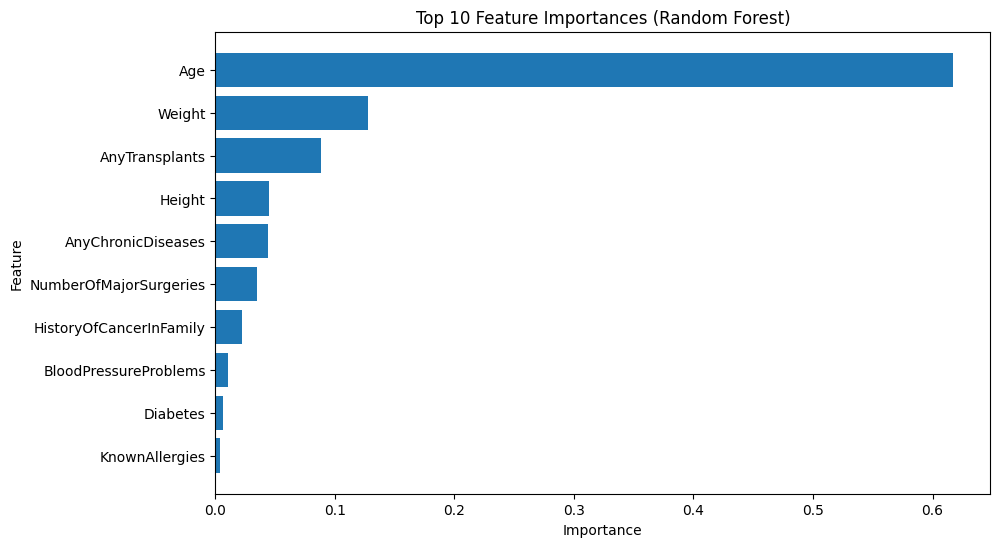

In [149]:
# Get feature importances
feature_importances = rf_model_unscaled.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

## Including polynomial features

In [154]:
# Initialize PolynomialFeatures (degree 2, no bias term)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generate polynomial features for training, validation, and test sets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(X_train.columns)
print(f"Number of features after polynomial transformation: {len(poly_feature_names)}")

Number of features after polynomial transformation: 65


In [157]:
# Initialize Random Forest Regressor
rf_model_poly = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1     # Minimum samples per leaf
)

# Train the model on polynomial features
rf_model_poly.fit(X_train_poly, y_train)

# Predict on training, validation, and test sets
y_train_pred_rf_poly = rf_model_poly.predict(X_train_poly)
y_val_pred_rf_poly = rf_model_poly.predict(X_val_poly)
y_test_pred_rf_poly = rf_model_poly.predict(X_test_poly)


In [159]:
# Evaluate on training set
r2_train = r2_score(y_train, y_train_pred_rf_poly)
mae_train = mean_absolute_error(y_train, y_train_pred_rf_poly)
rmse_train = mean_squared_error(y_train, y_train_pred_rf_poly, squared=False)

# Evaluate on validation set
r2_val = r2_score(y_val, y_val_pred_rf_poly)
mae_val = mean_absolute_error(y_val, y_val_pred_rf_poly)
rmse_val = mean_squared_error(y_val, y_val_pred_rf_poly, squared=False)

# Evaluate on test set
r2_test = r2_score(y_test, y_test_pred_rf_poly)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_poly)
rmse_test = mean_squared_error(y_test, y_test_pred_rf_poly, squared=False)

# Print results
print("\nTraining Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")

print("\nValidation Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_val:.2f}, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

print("\nTest Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")



Training Performance (Polynomial Features):
R-squared (R²): 0.96, MAE: 544.86, RMSE: 1183.22

Validation Performance (Polynomial Features):
R-squared (R²): 0.73, MAE: 1641.01, RMSE: 3426.33

Test Performance (Polynomial Features):
R-squared (R²): 0.93, MAE: 925.81, RMSE: 1758.89


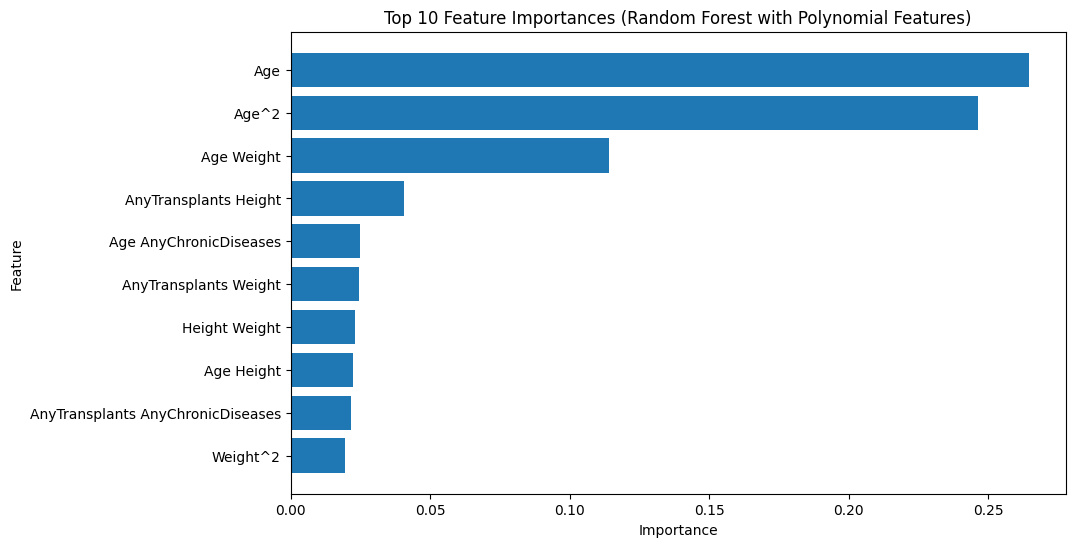

In [161]:
# Get feature importances
feature_importances = rf_model_poly.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest with Polynomial Features)')
plt.show()


In [163]:
# Save the model and transformer
with open('random_forest_poly_model.pkl', 'wb') as file:
    pickle.dump({'model': rf_model_poly, 'poly_transformer': poly}, file)

print("Model and transformer saved as 'random_forest_poly_model.pkl'.")

Model and transformer saved as 'random_forest_poly_model.pkl'.


### Hyper parameter tuning on Random Forest model

In [167]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required at a leaf node
}

In [170]:
# Initialize Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_cv = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=1,          # Display progress
    n_jobs=-1           # Use all available processors
)

# Fit GridSearchCV on the training data (polynomial features)
rf_cv.fit(X_train_poly, y_train)

# Get the best parameters and corresponding R² score
best_params = rf_cv.best_params_
best_r2 = rf_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R² from cross-validation: {best_r2:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best R² from cross-validation: 0.7254


In [174]:

# Use the best model from GridSearchCV
rf_best_poly = rf_cv.best_estimator_

# Predict on validation set
y_val_pred_rf_best = rf_best_poly.predict(X_val_poly)
r2_val = r2_score(y_val, y_val_pred_rf_best)
mae_val = mean_absolute_error(y_val, y_val_pred_rf_best)
rmse_val = mean_squared_error(y_val, y_val_pred_rf_best, squared=False)

print("\nValidation Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")

# Predict on test set
y_test_pred_rf_best = rf_best_poly.predict(X_test_poly)
r2_test = r2_score(y_test, y_test_pred_rf_best)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_best)
rmse_test = mean_squared_error(y_test, y_test_pred_rf_best, squared=False)

print("\nTest Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")



Validation Performance (Best Random Forest Model):
R-squared (R²): 0.7807
Mean Absolute Error (MAE): 1556.81
Root Mean Squared Error (RMSE): 3115.10

Test Performance (Best Random Forest Model):
R-squared (R²): 0.9307
Mean Absolute Error (MAE): 945.20
Root Mean Squared Error (RMSE): 1725.00


In [176]:
# Calculate metrics for the training dataset using the tuned Random Forest model
r2_train_rf_best = r2_score(y_train, y_train_pred_rf_poly)
mae_train_rf_best = mean_absolute_error(y_train, y_train_pred_rf_poly)
rmse_train_rf_best = mean_squared_error(y_train, y_train_pred_rf_poly, squared=False)

# Print training dataset performance
print("\nTrain Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_train_rf_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rf_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf_best:.2f}")


Train Performance (Best Random Forest Model):
R-squared (R²): 0.9620
Mean Absolute Error (MAE): 544.86
Root Mean Squared Error (RMSE): 1183.22


In [178]:
# Save the best Random Forest model and PolynomialFeatures transformer for deployment
with open('rf_best_poly_model_for_streamlit.pkl', 'wb') as file:
    pickle.dump({'model': rf_best_poly, 'poly_transformer': poly}, file)

print("\nBest model saved for deployment as 'rf_best_poly_model_for_streamlit.pkl'.")



Best model saved for deployment as 'rf_best_poly_model_for_streamlit.pkl'.


In [180]:
# Extract feature importance values from the model
feature_importances = rf_best_poly.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': poly.get_feature_names_out(X_train.columns),  # Feature names from PolynomialFeatures
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top n features
n = 20  # Set the number of top features to display
top_features_df = importance_df.head(n)

print(f"Top {n} Features by Importance:")
print(top_features_df)

Top 20 Features by Importance:
                              Feature  Importance
10                              Age^2    0.301684
0                                 Age    0.258877
16                         Age Weight    0.112610
39              AnyTransplants Height    0.035552
14             Age AnyChronicDiseases    0.025882
40              AnyTransplants Weight    0.025556
38  AnyTransplants AnyChronicDiseases    0.023949
15                         Age Height    0.021262
51                      Height Weight    0.017225
13                 Age AnyTransplants    0.016300
18        Age HistoryOfCancerInFamily    0.015731
55                           Weight^2    0.015693
6                              Weight    0.013206
19         Age NumberOfMajorSurgeries    0.012446
58      Weight NumberOfMajorSurgeries    0.012119
46          AnyChronicDiseases Weight    0.009721
33       BloodPressureProblems Weight    0.009052
54      Height NumberOfMajorSurgeries    0.008504
45          AnyChro

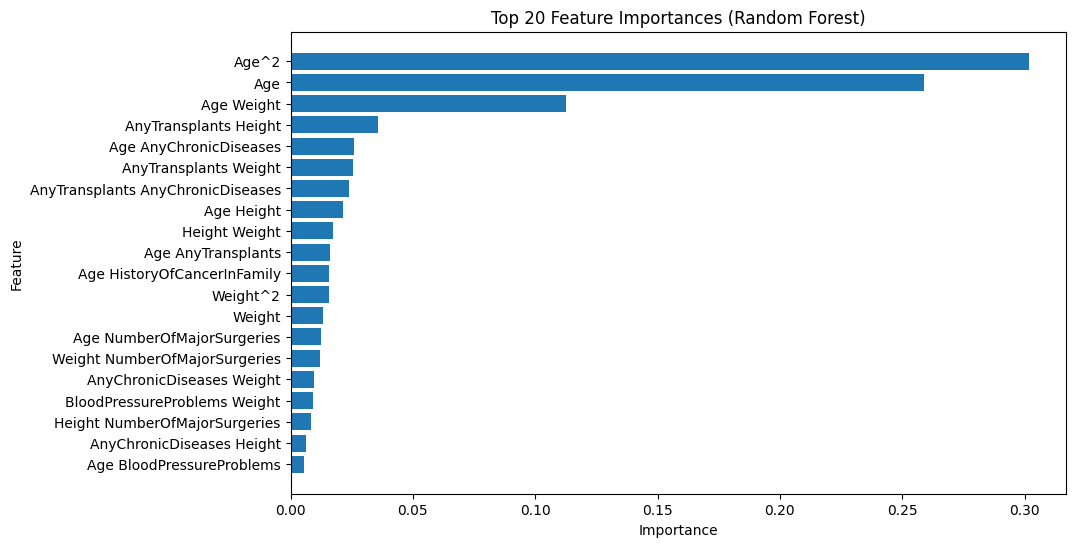

In [182]:
# Plot top n features
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'][::-1], top_features_df['Importance'][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Feature Importances (Random Forest)')
plt.show()

In [184]:
# # Predictions on training, validation, and test datasets
# y_train_pred_rf_best_poly = rf_best_poly.predict(X_train_poly)
# y_val_pred_rf_best_poly = rf_best_poly.predict(X_val_poly)
# y_test_pred_rf_best_poly = rf_best_poly.predict(X_test_poly)

# # Combine features, actual values, and predictions for each dataset
# # Training dataset
# train_output_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
# train_output_df['Actual_PremiumPrice'] = y_train.values
# train_output_df['Predicted_PremiumPrice'] = y_train_pred_rf_best_poly

# # Validation dataset
# val_output_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names_out(X_train.columns))
# val_output_df['Actual_PremiumPrice'] = y_val.values
# val_output_df['Predicted_PremiumPrice'] = y_val_pred_rf_best_poly

# # Test dataset
# test_output_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_train.columns))
# test_output_df['Actual_PremiumPrice'] = y_test.values
# test_output_df['Predicted_PremiumPrice'] = y_test_pred_rf_best_poly

# # Save each dataset to an Excel file
# train_output_path = "train_predictions_rf_best_poly.xlsx"
# val_output_path = "val_predictions_rf_best_poly.xlsx"
# test_output_path = "test_predictions_rf_best_poly.xlsx"

# train_output_df.to_excel(train_output_path, index=False)
# val_output_df.to_excel(val_output_path, index=False)
# test_output_df.to_excel(test_output_path, index=False)

# print(f"Training predictions saved to: {train_output_path}")
# print(f"Validation predictions saved to: {val_output_path}")
# print(f"Test predictions saved to: {test_output_path}")

In [186]:
# Initialize Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
gbr.fit(X_train_poly, y_train)

# Predict and evaluate
y_val_pred_gbr = gbr.predict(X_val_poly)
r2_val_gbr = r2_score(y_val, y_val_pred_gbr)
print(f"Gradient Boosting Validation R²: {r2_val_gbr:.4f}")

Gradient Boosting Validation R²: 0.7268


In [187]:
# pip install xgboost

In [189]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage
    max_depth=5,           # Maximum depth of a tree
    subsample=0.8,         # Subsample ratio of training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42        # For reproducibility
)

# Train the model on the polynomial training data
xgb_model.fit(X_train_poly, y_train)

# Predict on the validation set
y_val_pred_xgb = xgb_model.predict(X_val_poly)

# Evaluate the XGBoost model
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
rmse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb, squared=False)

print("\nValidation Performance (XGBoost):")
print(f"R-squared (R²): {r2_val_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_xgb:.2f}")



Validation Performance (XGBoost):
R-squared (R²): 0.7362
Mean Absolute Error (MAE): 1680.42
Root Mean Squared Error (RMSE): 3416.20


In [191]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
xgb_grid_search.fit(X_train_poly, y_train)

# Get best parameters and performance
print("Best Parameters (XGBoost):", xgb_grid_search.best_params_)
print("Best R² from CV (XGBoost):", xgb_grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.6}
Best R² from CV (XGBoost): 0.729238498210907
